In [18]:
!pip install pandas scikit-learn

# content-based music recommendation system using a basic TF-IDF approach for feature representation and cosine similarity for finding similar songs.

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [20]:
data = pd.read_csv('C:/Users/Chandu-pc/OneDrive/Desktop/archive/data.csv')

In [35]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [32]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist', 'features'],
      dtype='object')

In [42]:
data = data.rename(columns={'Unnamed: 0': 'id'})

In [43]:
data.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,features
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,0.0102 0.833 0.434 0.0219 0.165 -8.795 0.431 1...
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,0.199 0.743 0.359 0.00611 0.137 -10.401 0.0794...
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,0.0344 0.838 0.412 0.000234 0.159 -7.148 0.289...
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,0.604 0.494 0.338 0.51 0.0922 -15.236 0.0261 8...
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,0.18 0.678 0.561 0.512 0.439 -11.648 0.0694 17...


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

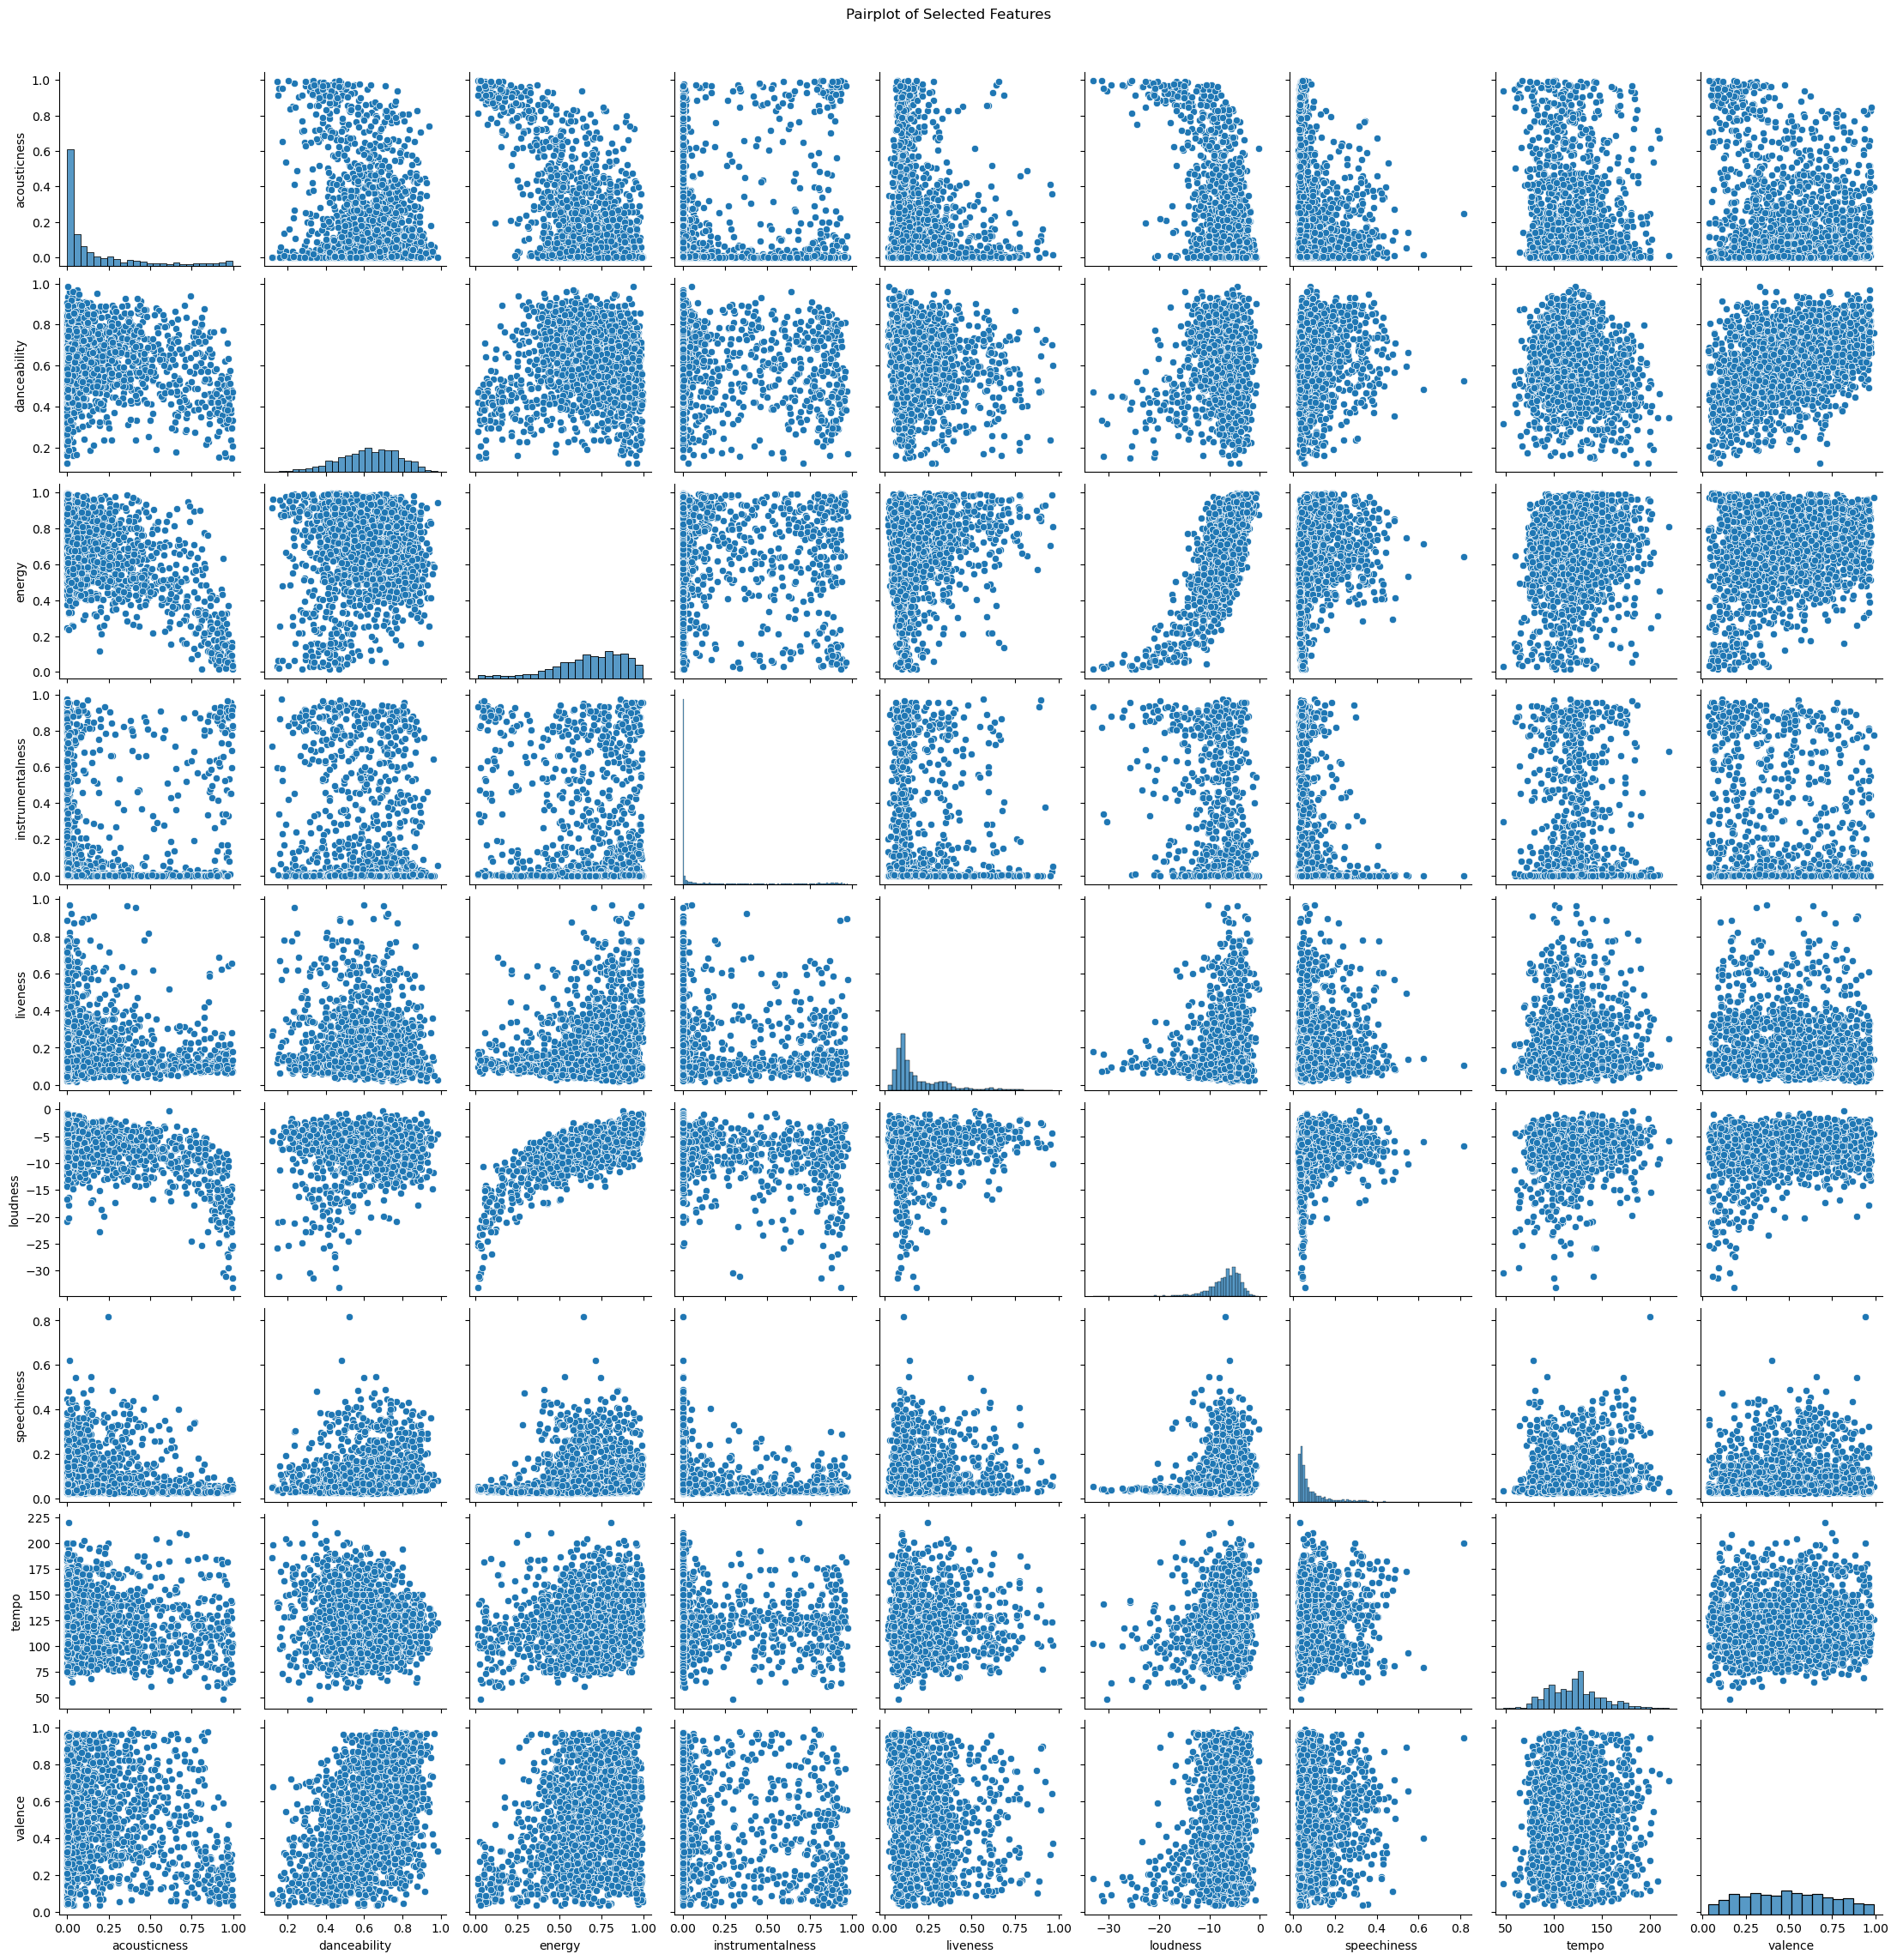

In [68]:
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

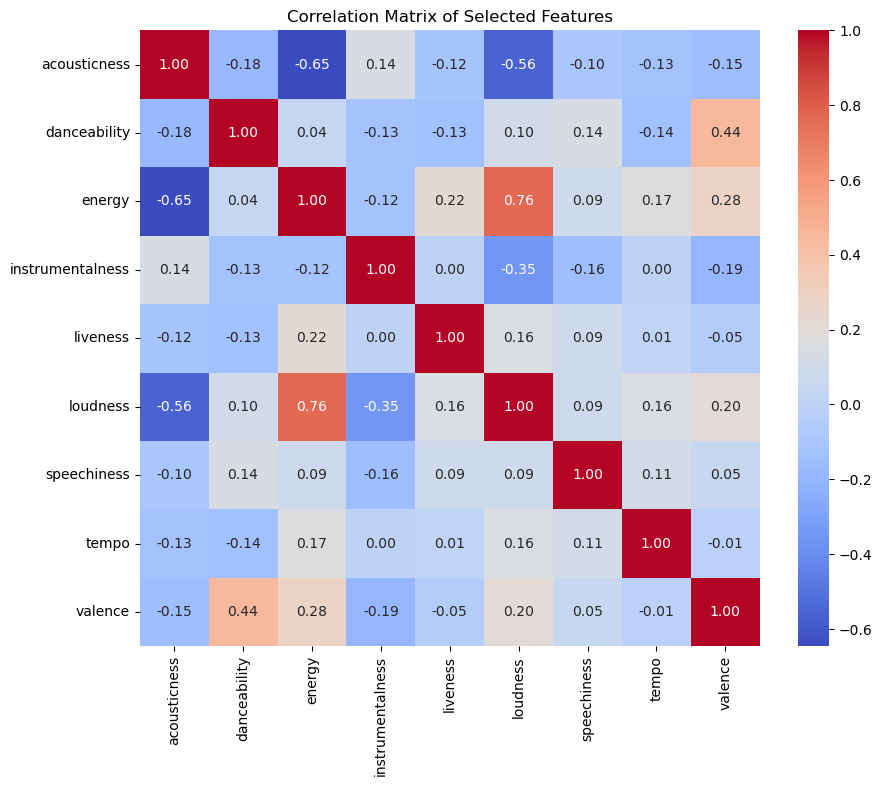

In [69]:
correlation_matrix = data[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [70]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [71]:
data[features] =data[features].fillna(0)

In [72]:
data['features'] = data[features].astype(str).agg(' '.join, axis=1)

In [73]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['features'])

In [74]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [75]:
def get_recommendations(song_title, cosine_sim=cosine_sim):
    idx = data[data['song_title'] == song_title].index[0]

    # Get the pairwise similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    return data['song_title'].iloc[song_indices]


In [76]:
example_song_title = 'Mask Off'
recommendations = get_recommendations(example_song_title)
print(recommendations)

1173                                         Mask Off
12                                            Cemalim
1761    My Love Is Like...Wo - Main Mix/Album Version
25                                   This Ready Flesh
1032                             Yours If You Want It
128                                    Hercules Theme
1381                             너와의 공식 Love Equation
31                Blasé (feat. Future & Rae Sremmurd)
1499                                      Eyes Closed
1144                                       No Vacancy
Name: song_title, dtype: object


# collaborative filtering using matrix factorization with TruncatedSVD

In [79]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
utility_matrix =data[features].values.T

In [81]:
n_components = 10  # You can adjust this based on your preferences
svd = TruncatedSVD(n_components=n_components)
latent_matrix = svd.fit_transform(utility_matrix)

In [82]:
item_similarity = cosine_similarity(latent_matrix, dense_output=False)

In [83]:
def get_recommendations(track_id):
    # Get the index of the track in the dataset
    track_index = data.index[data['id'] == track_id].tolist()[0]

    # Get the similarity scores with other tracks
    sim_scores = item_similarity[track_index]

    # Get the indices of the top 5 most similar tracks
    top_indices = sim_scores.argsort()[-6:-1][::-1]

    # Print recommended tracks
    recommended_tracks = data.loc[top_indices, ['id', 'song_title', 'artist']]
    print(recommended_tracks)


In [84]:
example_track_id = 5
get_recommendations(example_track_id)

   id      song_title       artist
3   3  Master Of None  Beach House
6   6     Childs Play        Drake
4   4  Parallel Lines  Junior Boys
0   0        Mask Off       Future
2   2    Xanny Family       Future


In [85]:
example_track_id = 2
get_recommendations(example_track_id)

   id         song_title            artist
7   7    Gyöngyhajú lány             Omega
1   1            Redbone  Childish Gambino
8   8  I've Seen Footage       Death Grips
4   4     Parallel Lines       Junior Boys
6   6        Childs Play             Drake


# KNN model for collaborative filtering

In [86]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [88]:
utility_matrix =data[features].values

In [89]:
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(utility_matrix)

NearestNeighbors(metric='cosine')

In [90]:
def get_recommendations(track_id):
    # Get the index of the track in the dataset
    track_index = data.index[data['id'] == track_id].tolist()[0]

    # Get the indices of the k-nearest neighbors
    distances, neighbor_indices = knn_model.kneighbors([utility_matrix[track_index]])

    # Print recommended tracks
    recommended_tracks = data.loc[neighbor_indices[0], ['id', 'song_title', 'artist']]
    print(recommended_tracks)


In [91]:
example_track_id = 2
get_recommendations(example_track_id)

      id     song_title        artist
2      2   Xanny Family        Future
699  699         R.I.P.         Jeezy
704  704    Marc Jacobs     Riff Raff
715  715   Tennis Court         Lorde
567  567  Stomp - Dirty  5kinAndBone5


In [92]:
example_track_id = 1
get_recommendations(example_track_id)

        id      song_title                    artist
1        1         Redbone          Childish Gambino
1187  1187        Lollipop                 Lil Wayne
302    302      Johnny Was  Bob Marley & The Wailers
1763  1763  For You I Will                    Monica
1869  1869    Memorial Day           The Accidentals
